<a href="https://colab.research.google.com/github/tolemy03/FARMHouse.Plantdisease/blob/main/inceptionv3_plant_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall keras -y

In [ ]:
!pip install keras==2.15.0

In [ ]:
!pip install tensorflow==2.15.0

In [ ]:
import os
import numpy as np

import keras
import keras.backend as k
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from keras.models import Model

from keras.layers import Input, Activation, Dense, Flatten, Dropout
from keras.layers import add
from keras.applications.inception_v3 import InceptionV3

from keras.models import load_model

2024-08-26 05:35:31.922044: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-26 05:35:31.922101: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-26 05:35:31.924004: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
train_dir = "/kaggle/input/plantleaf01/train"
test_dir = "/kaggle/input/plantleaf01/test"

In [ ]:
for root,dris,files in os.walk(train_dir):
  print(root,len(files))

/kaggle/input/plantleaf01/train 0
/kaggle/input/plantleaf01/train/Citrus_Canker 660
/kaggle/input/plantleaf01/train/Citrus_Miner 261
/kaggle/input/plantleaf01/train/Corn_Blight 430
/kaggle/input/plantleaf01/train/Citrus_Healthy 649
/kaggle/input/plantleaf01/train/Corn_Healthy 540
/kaggle/input/plantleaf01/train/Potato_Late_blight 315
/kaggle/input/plantleaf01/train/Tomato_Bacterial_spot 386
/kaggle/input/plantleaf01/train/Potato_Healthy 300
/kaggle/input/plantleaf01/train/Rice_BrownSpot 336
/kaggle/input/plantleaf01/train/Tomato_healthy 389
/kaggle/input/plantleaf01/train/Strawberry_Healthy 475
/kaggle/input/plantleaf01/train/Strawberry_Leaf_Scorch 464
/kaggle/input/plantleaf01/train/Jute_Healthy 437
/kaggle/input/plantleaf01/train/Tomato_Early_blight 373
/kaggle/input/plantleaf01/train/Jute_Cut_Worm_and_Mosaic 398
/kaggle/input/plantleaf01/train/Potato_Early_Blight 397
/kaggle/input/plantleaf01/train/Rice_LeafBlast 371
/kaggle/input/plantleaf01/train/Tomato_Late_blight 376
/kaggle/inp

In [ ]:
for root,dris,files in os.walk(test_dir):
  print(root,len(files))

/kaggle/input/plantleaf01/test 0
/kaggle/input/plantleaf01/test/Citrus_Canker 202
/kaggle/input/plantleaf01/test/Citrus_Miner 138
/kaggle/input/plantleaf01/test/Corn_Blight 196
/kaggle/input/plantleaf01/test/Citrus_Healthy 182
/kaggle/input/plantleaf01/test/Corn_Healthy 159
/kaggle/input/plantleaf01/test/Potato_Late_blight 148
/kaggle/input/plantleaf01/test/Tomato_Bacterial_spot 184
/kaggle/input/plantleaf01/test/Potato_Healthy 166
/kaggle/input/plantleaf01/test/Rice_BrownSpot 179
/kaggle/input/plantleaf01/test/Tomato_healthy 166
/kaggle/input/plantleaf01/test/Strawberry_Healthy 142
/kaggle/input/plantleaf01/test/Strawberry_Leaf_Scorch 185
/kaggle/input/plantleaf01/test/Jute_Healthy 170
/kaggle/input/plantleaf01/test/Tomato_Early_blight 161
/kaggle/input/plantleaf01/test/Jute_Cut_Worm_and_Mosaic 186
/kaggle/input/plantleaf01/test/Potato_Early_Blight 196
/kaggle/input/plantleaf01/test/Rice_LeafBlast 181
/kaggle/input/plantleaf01/test/Tomato_Late_blight 164
/kaggle/input/plantleaf01/test

In [ ]:
output_classes = 20
batch_size = 32
img_height, img_width = 224,224
input_shape = (img_height, img_width, 3)
epochs = 50

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (img_height,img_width),
                                                    batch_size = batch_size,
                                                    shuffle = True,
                                                    class_mode = "categorical")

Found 8267 images belonging to 20 classes.


In [ ]:
train_generator.class_indices

{'Citrus_Canker': 0,
 'Citrus_Healthy': 1,
 'Citrus_Miner': 2,
 'Corn_Blight': 3,
 'Corn_Healthy': 4,
 'Jute_Black_Band_and_Mosaic': 5,
 'Jute_Cut_Worm_and_Mosaic': 6,
 'Jute_Healthy': 7,
 'Potato_Early_Blight': 8,
 'Potato_Healthy': 9,
 'Potato_Late_blight': 10,
 'Rice_BrownSpot': 11,
 'Rice_Healthy': 12,
 'Rice_LeafBlast': 13,
 'Strawberry_Healthy': 14,
 'Strawberry_Leaf_Scorch': 15,
 'Tomato_Bacterial_spot': 16,
 'Tomato_Early_blight': 17,
 'Tomato_Late_blight': 18,
 'Tomato_healthy': 19}

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size = (img_height,img_width),
                                                  batch_size = batch_size,
                                                  shuffle = False,
                                                  class_mode = "categorical")

Found 3479 images belonging to 20 classes.


In [ ]:
test_generator.class_indices

{'Citrus_Canker': 0,
 'Citrus_Healthy': 1,
 'Citrus_Miner': 2,
 'Corn_Blight': 3,
 'Corn_Healthy': 4,
 'Jute_Black_Band_and_Mosaic': 5,
 'Jute_Cut_Worm_and_Mosaic': 6,
 'Jute_Healthy': 7,
 'Potato_Early_Blight': 8,
 'Potato_Healthy': 9,
 'Potato_Late_blight': 10,
 'Rice_BrownSpot': 11,
 'Rice_Healthy': 12,
 'Rice_LeafBlast': 13,
 'Strawberry_Healthy': 14,
 'Strawberry_Leaf_Scorch': 15,
 'Tomato_Bacterial_spot': 16,
 'Tomato_Early_blight': 17,
 'Tomato_Late_blight': 18,
 'Tomato_healthy': 19}

In [ ]:
from keras.models import Sequential

In [ ]:
model = Sequential()

model.add(InceptionV3(weights="imagenet", include_top=False, pooling="avg"))
model.add(Dropout(rate=0.5))
model.add(Dense(units=output_classes, activation="softmax"))

model.layers[0].trainable = False

In [ ]:
model.compile(optimizer=Adam(learning_rate = 0.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 20)                40980     
                                                                 
Total params: 21843764 (83.33 MB)
Trainable params: 40980 (160.08 KB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [ ]:
!pip install visualkeras

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


/opt/conda/lib/python3.10/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


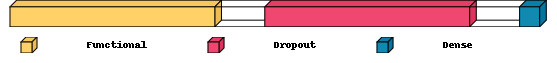

In [ ]:
import visualkeras

visualkeras.layered_view(model)
visualkeras.layered_view(model, legend=True, draw_volume=True, spacing=50)

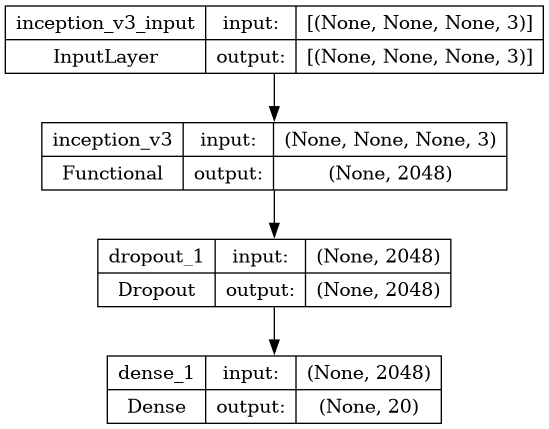

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

model_path = "/kaggle/working/InceptionV3.h5"
checkpoint = ModelCheckpoint(model_path, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max")

early_stopping = EarlyStopping(monitor='val_accuracy', patience=99, restore_best_weights=True)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
model_hist = model.fit(train_generator,
                       steps_per_epoch = len(train_generator),
                       epochs = epochs,
                       verbose = 1,
                       validation_data = test_generator,
                       validation_steps = len(test_generator),
                       callbacks=callbacks_list)

Epoch 1/50
259/259 [==============================] - ETA: 0s - loss: 2.5248 - accuracy: 0.2422
Epoch 1: val_accuracy improved from -inf to 0.57574, saving model to /kaggle/working/InceptionV3.h5


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


259/259 [==============================] - 168s 634ms/step - loss: 2.5248 - accuracy: 0.2422 - val_loss: 1.5416 - val_accuracy: 0.5757
Epoch 2/50
259/259 [==============================] - ETA: 0s - loss: 1.5395 - accuracy: 0.5073
Epoch 2: val_accuracy improved from 0.57574 to 0.70566, saving model to /kaggle/working/InceptionV3.h5
259/259 [==============================] - 164s 635ms/step - loss: 1.5395 - accuracy: 0.5073 - val_loss: 1.0672 - val_accuracy: 0.7057
Epoch 3/50
259/259 [==============================] - ETA: 0s - loss: 1.1775 - accuracy: 0.6104
Epoch 3: val_accuracy improved from 0.70566 to 0.76085, saving model to /kaggle/working/InceptionV3.h5
259/259 [==============================] - 156s 601ms/step - loss: 1.1775 - accuracy: 0.6104 - val_loss: 0.8562 - val_accuracy: 0.7609
Epoch 4/50
259/259 [==============================] - ETA: 0s - loss: 1.0085 - accuracy: 0.6625
Epoch 4: val_accuracy improved from 0.76085 to 0.79276, saving model to /kaggle/working/InceptionV3.h

In [ ]:
import matplotlib.pyplot as plt

/tmp/ipykernel_100/1137683778.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


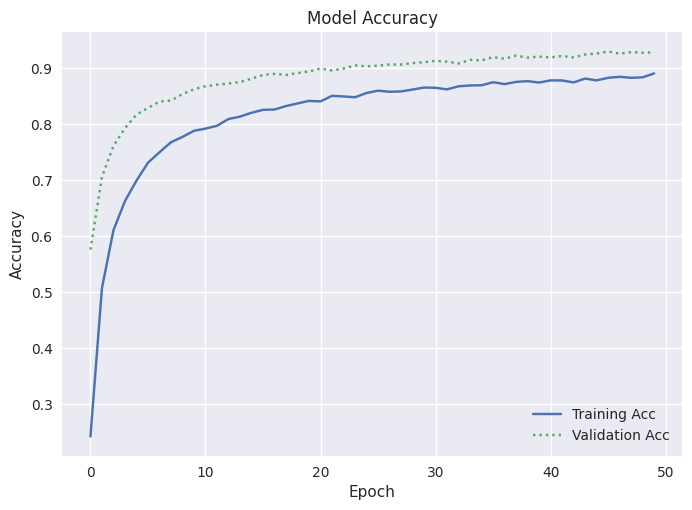

In [ ]:
plt.style.use("seaborn")
plt.plot(model_hist.history["accuracy"])
plt.plot(model_hist.history["val_accuracy"],":")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training Acc","Validation Acc"], loc="lower right")
plt.show()

/tmp/ipykernel_100/3697672577.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


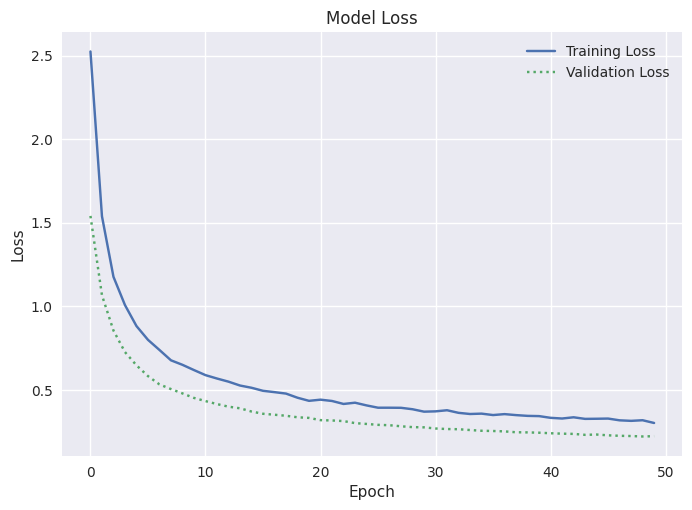

In [ ]:
plt.style.use("seaborn")
plt.plot(model_hist.history["loss"])
plt.plot(model_hist.history["val_loss"],":")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training Loss","Validation Loss"], loc="upper right")
plt.show()

In [ ]:
filename = test_generator.filenames
truth = test_generator.classes
label = test_generator.class_indices
indexlabel = dict((value, key) for key, value in label.items())

predicts = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size, verbose = 1)
predict_class = np.argmax(predicts, axis=1)
errors = np.where(predict_class != truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))

/tmp/ipykernel_100/573469936.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predicts = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size, verbose = 1)


108/108 [==============================] - 28s 243ms/step
No of errors = 250/3479


Confusion Matrix
[[189   4   8   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0
    0   0]
 [  0 182   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [ 25   0 113   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0 195   0   0   0   0   0   0   0   0   0   1   0   0   0   0
    0   0]
 [  0   0   0   0 159   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  2   0   0   0   0 164  11   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   5 181   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   1   0   0   0   0   1 167   0   0   0   0   0   0   1   0   0   0
    0   0]
 [  1   0   0   0   0   1   0   0 179   2  11   0   0   0   0   0   0   0
    1   1]
 [  0   0   0   0   0   0   0   0   7 153   2   0   0   0   0   0   0   0
    0   4]
 [  0   0   0   0   0   0   0   0  27   1 110   0   0   0   1   1   0   1
    7   0]
 [  0   0   0   0   0   0   0   0   0   0   0 15

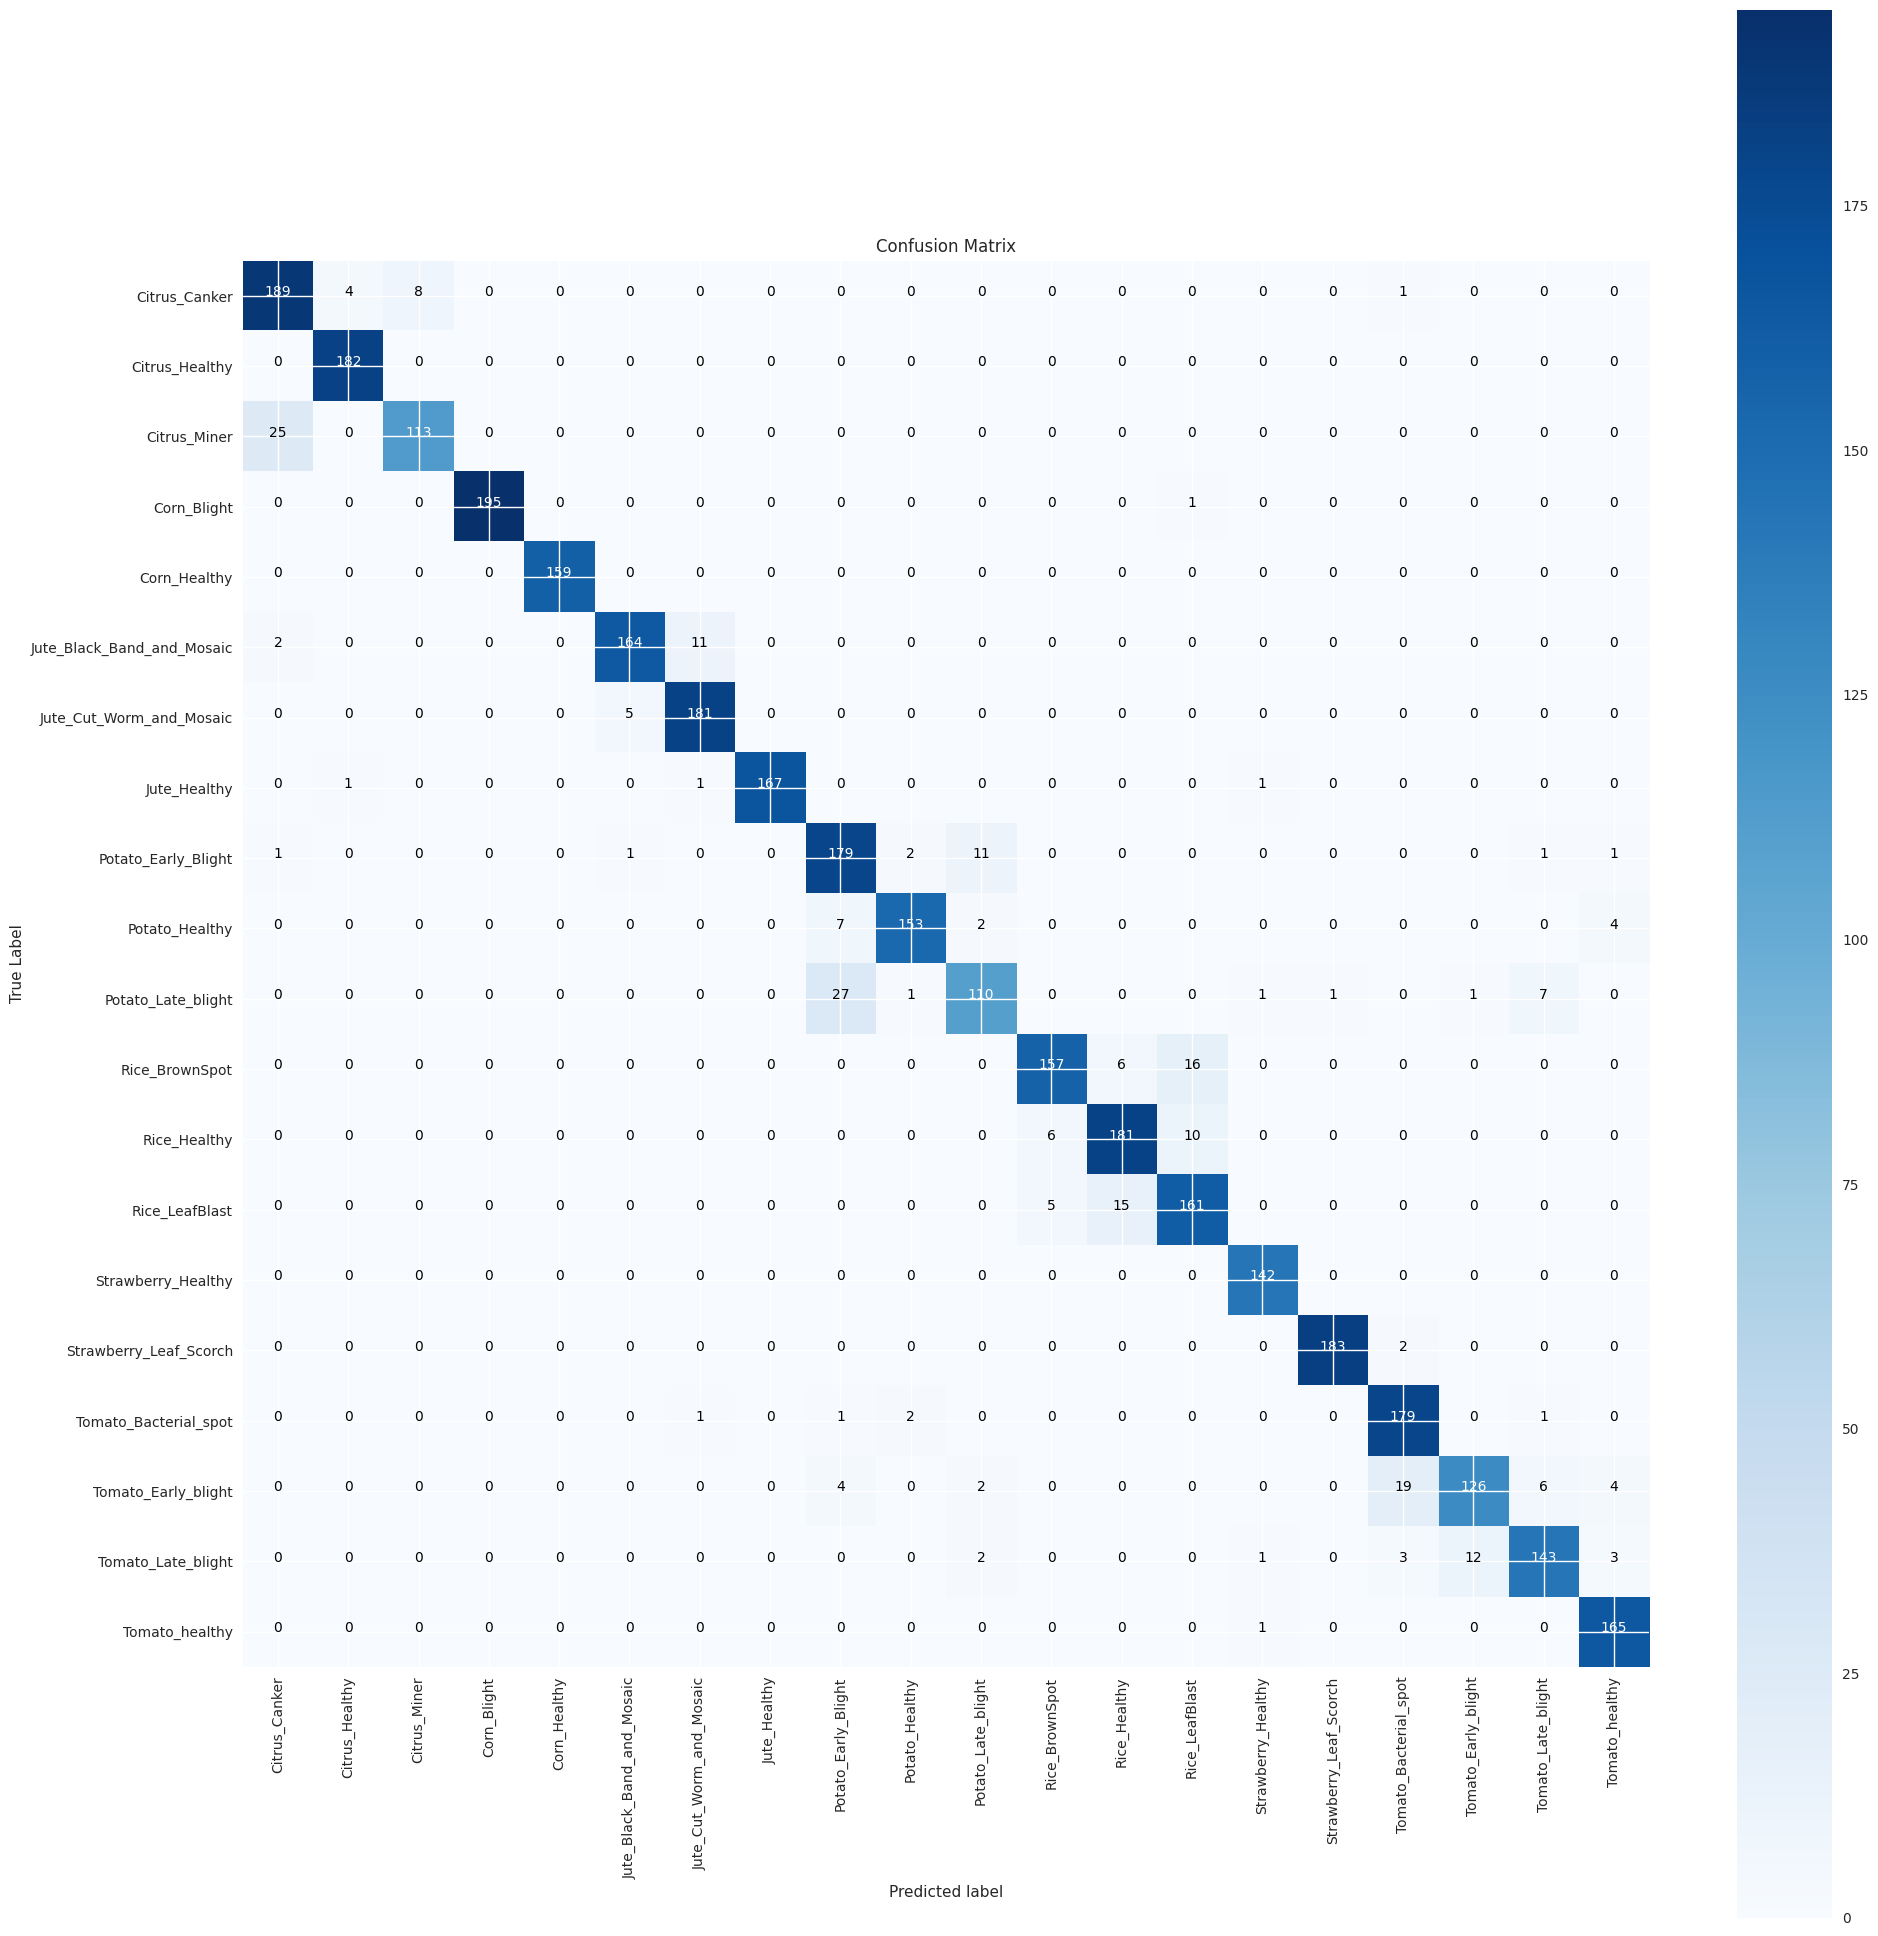

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(truth, predict_class)

labels = []
for k,v in indexlabel.items():
  labels.append(v)

import itertools
def plot_confusion_matrix(cm,
                          classes,
                          normalize = False,
                          title = "Confusion Matrix",
                          cmap = plt.cm.Blues):
  accuracy = np.trace(cm) / float(np.sum(cm))
  misclass = 1 - accuracy

  if normalize:
    cm = cm.astype("float") / cm.sum(axis - 1)[:, np.newaxis]
    print("Normalize confusion matrix")
  else:
    print("Confusion Matrix")

  print(cm)

  plt.imshow(cm, interpolation="nearest",cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=90)
  plt.yticks(tick_marks, classes)
  fmt = ".2f" if normalize else "d"
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment="center",
             color="white" if cm[i,j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel("True Label")
  plt.xlabel("Predicted label")

plt.figure(figsize=(20,20))

plot_confusion_matrix(cm,classes=labels,title="Confusion Matrix")




In [ ]:
from sklearn.metrics import classification_report
y_pred = predicts
y_pred_probability = y_pred

y_pred = np.argmax(y_pred, axis=1)
y_actual = test_generator.classes

classnames = []

for classname in test_generator.class_indices:
  classnames.append(classname)

target_names = classnames
print(classification_report(y_actual, y_pred, target_names = target_names))

                            precision    recall  f1-score   support

             Citrus_Canker       0.87      0.94      0.90       202
            Citrus_Healthy       0.97      1.00      0.99       182
              Citrus_Miner       0.93      0.82      0.87       138
               Corn_Blight       1.00      0.99      1.00       196
              Corn_Healthy       1.00      1.00      1.00       159
Jute_Black_Band_and_Mosaic       0.96      0.93      0.95       177
  Jute_Cut_Worm_and_Mosaic       0.93      0.97      0.95       186
              Jute_Healthy       1.00      0.98      0.99       170
       Potato_Early_Blight       0.82      0.91      0.86       196
            Potato_Healthy       0.97      0.92      0.94       166
        Potato_Late_blight       0.87      0.74      0.80       148
            Rice_BrownSpot       0.93      0.88      0.90       179
              Rice_Healthy       0.90      0.92      0.91       197
            Rice_LeafBlast       0.86      0.89